<h1>Лабораторная работа №5</h1>
<h2>Обрати реальні дані з kaggle або сгенерувати випадкові дані, що містять розподіл деякої ознаки в двох групах.</h2>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df=pd.read_csv("ebola_2014_2016_clean.csv", encoding = 'utf-8')
df

,Country,Date,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths"
0,Guinea,2014-08-29,25.0,141.0,482.0,648.0,2.0,141.0,287.0,430.0
1,Nigeria,2014-08-29,3.0,1.0,15.0,19.0,0.0,1.0,6.0,7.0
2,Sierra Leone,2014-08-29,54.0,37.0,935.0,1026.0,8.0,34.0,380.0,422.0
3,Liberia,2014-08-29,382.0,674.0,322.0,1378.0,168.0,301.0,225.0,694.0
4,Sierra Leone,2014-09-05,78.0,37.0,1146.0,1261.0,11.0,37.0,443.0,491.0
...,...,...,...,...,...,...,...,...,...,...
94,Nigeria,2014-10-25,0.0,1.0,19.0,20.0,0.0,1.0,7.0,8.0
95,Guinea,2014-10-25,47.0,194.0,1312.0,1553.0,0.0,194.0,732.0,926.0
96,Liberia,2014-10-25,1594.0,2106.0,965.0,4665.0,661.0,803.0,1241.0,2705.0
97,Liberia,2014-10-29,2480.0,1540.0,2515.0,6535.0,NaN,NaN,NaN,2413.0


In [3]:
k = pd.crosstab(df['No. of confirmed, probable and suspected deaths'], df['No. of suspected deaths'])
k

No. of suspected deaths,0.0,1.0,2.0,3.0,4.0,5.0,8.0,11.0,12.0,31.0,...,296.0,310.0,364.0,413.0,415.0,444.0,458.0,491.0,519.0,661.0
"No. of confirmed, probable and suspected deaths",,,,,,,,,,,,,,,,,,,,,
0.0,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8.0,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422.0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
430.0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
491.0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
509.0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
517.0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


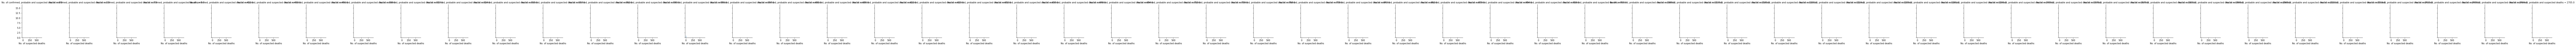

In [4]:
fig = sns.FacetGrid(df, col="No. of confirmed, probable and suspected deaths")
fig = fig.map(plt.hist, "No. of suspected deaths");

In [9]:
def Pirson_Test(inf, significant_level):
    flag = []*0
    group = []*0
    f=0
    for i in inf.iloc[:,0]:
        f = True
        for j in flag:
            if(i == j):
                f = False
        if(f):
            flag.append(i)
    for i in inf.iloc[:,1]:
        f = True
        for j in group:
            if(i == j):
                f = False
        if(f):
            group.append(i)
    flag = np.sort(flag)
    group = np.sort(group)
    criterion = pd.DataFrame({
        (group[0]):(0 for i in range(len(flag))),
        (group[1]):(0 for i in range(len(flag))),}, index = flag)
    for i in range(len(inf)):
        criterion [inf.iloc[i,1]][inf.iloc[i,0]] += 1
    if (sum(criterion.iloc[:,0]) != sum(criterion.iloc[:,1])):
        for i in criterion.iloc[:,1]:
            criterion[criterion.columns[1]] = [i/sum(criterion.iloc[:,1])*sum(criterion.iloc[:,0])]
    else:
        criterion[criterion.columns[1]] = criterion[criterion.columns[1]]
    criterion["(𝑛𝑖−𝑛̀𝑖)^2"] = [(criterion.iloc[i,0] - criterion.iloc[i,1])**2 for i in range(len(criterion))]
    criterion["(𝑛𝑖−𝑛̀𝑖)^2/𝑛̀𝑖"] = [criterion.iloc[i,2]/criterion.iloc[i,1] for i in range(len(criterion))]
    print("Таблиця спряженості:")
    print(criterion)
    hi = sum(criterion.iloc[:,3])
    print("\nχ^2 = " + str(hi))
    print("Кількість ступенів свободи: " + str(len(criterion)-1))
    table = pd.read_excel("Таблиця критичних значень для критерію Пірсона.xlsx").iloc[len(criterion)-1, 1 if(significant_level == 0.01) else 2]
    print("χ^2 критичне = " + str(table))
    result = 0
    if (hi < table):
        result = "Розбіжність відсутня або не суттєва, оскільки %.5f "%hi+"< %.1f (критичне)"%table
    else:
        result = "Розбіжність присутня, оскільки %.5f "%hi+"> %.1f (критичне)"%table
    return result

Перевірити розбіжність на між групами на даних з п. 1. В результаті сформувати таблицю спряженості

In [10]:
Pirson_Test(df, 0.01)

KeyError: '2014-09-08'